In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from scipy import io as sio

from utils import GenerateHaarFeatureMasks, ExtractHaarFeatures
from classifier import WeakClassifier, WeakClassifierError

plt.rcParams['figure.facecolor']='white'

In [2]:
# Hyper-parameters

# Number of randomized Haar-features
nbrHaarFeatures = 25

# Number of training images, will be evenly split between faces and
# non-faces. (Should be even.)
nbrTrainImages = 500

# Number of weak classifiers
nbrWeakClassifiers = 30

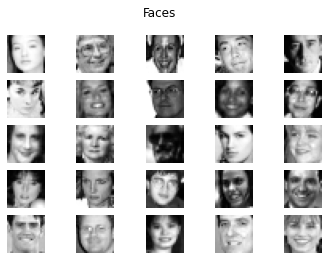

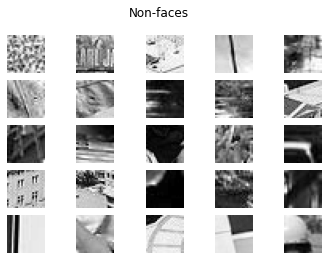

In [182]:
# Load face and non-face data and plot a few examples
faces = sio.loadmat('faces.mat')['faces']
nonfaces = sio.loadmat('nonfaces.mat')['nonfaces']

faces = faces.astype('double')[:,:,np.random.permutation(faces.shape[-1])]
nonfaces = nonfaces.astype('double')[:,:,np.random.permutation(nonfaces.shape[-1])]

plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(faces[:,:,10*i], cmap='gray')
    plt.axis('off')
plt.suptitle('Faces')

plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(nonfaces[:,:,10*i], cmap='gray')
    plt.axis('off')
plt.suptitle('Non-faces')
plt.show()

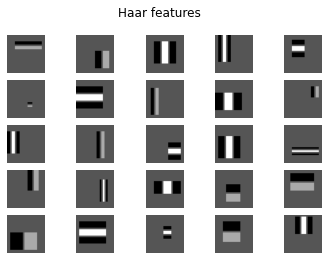

In [183]:
# Generate Haar feature masks
haarFeatureMasks = GenerateHaarFeatureMasks(nbrHaarFeatures)

plt.figure()
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.imshow(haarFeatureMasks[:,:,k], cmap='gray', vmin=-1, vmax=2)
    plt.axis('off')
plt.suptitle('Haar features')
plt.show()

In [184]:
# Create image sets (do not modify!)

# Create a training data set with examples from both classes.
# Non-faces = class label y=-1, faces = class label y=1
trainImages = np.concatenate((faces[:,:,:nbrTrainImages//2], nonfaces[:,:,:nbrTrainImages//2]), axis=2)
xTrain = ExtractHaarFeatures(trainImages,haarFeatureMasks)
yTrain = np.concatenate((np.ones(nbrTrainImages//2), -np.ones(nbrTrainImages//2)))


# Create a test data set, using the rest of the faces and non-faces.
testImages  = np.concatenate((faces[:,:,nbrTrainImages//2:], nonfaces[:,:,nbrTrainImages//2:]), axis=2)
xTest = ExtractHaarFeatures(testImages,haarFeatureMasks)
yTest = np.concatenate((np.ones(faces.shape[2]-nbrTrainImages//2), -np.ones(nonfaces.shape[2]-nbrTrainImages//2)))


# Variable for the number of test-data.
nbrTestImages = yTest.shape

In [237]:
# First loop for the number of classifiers

weights = 1.0/len(yTrain)
classifiers = []
#thres_list = []
#Polar_list = []
best_feat = []
for classifier in range(5):
    thres_list = []
    Polar_list = []
    best_feat = []
    min_loss = float('inf')
    
    # Second loop to go over every feature
    for feat in range(nfeatures):
        
        feature = xTrain[feat,:]
        
        thresholds = np.unique(feature)
        
        
        # third loop to go over every threshold
        for thres in thresholds:
           
            
            p=1
            preds=np.ones(nsamples)
            preds[feature<thres]=-1
            
            loss = WeakClassifierError(C = preds, D = weights, Y = yTrain)
            
            if loss > 0.5:
                p = -1
                loss = 1-loss
            
            losses.append((thres,loss,p))
        thres_list.append(sorted(losses, key = lambda point:point[1])[0][0])
        Polar_list.append(sorted(losses, key = lambda point:point[1])[0][2])
        
        pred = WeakClassifier(T = thres_list[feat], P = Polar_list[feat], X = xTrain[feat,:])
        loss = WeakClassifierError(C = pred, D= weights,  Y = yTrain)

        if loss > 0.5:
            loss = 1 - loss
        best_feat.append(loss)
        
    feature_idx = best_feat.index(min(best_feat))
    print(feature_idx)
    
    
    EPS = 1e-10
    alpha_t = 0.5*np.log((1.0-min(best_feat)+EPS)/(min(best_feat)+EPS))
    prediction = WeakClassifier(T = thres_list[feature_idx] , P = Polar_list[feature_idx], 
                                X = xTrain[feature_idx,:])
    weights = weights * np.exp(-alpha_t * yTrain * prediction)
    weights = weights / sum(weights)
    classifiers.append(alpha_t*WeakClassifier(T = thres_list[feature_idx] , P = Polar_list[feature_idx], 
                                              X = xTrain[feature_idx,:]))
   
    
y_pred =np.sum(classifiers, axis=0)
y_pred = np.sign(y_pred)

        
    

21
24
7
4
4


In [239]:
sum(y_pred == yTrain)/len(yTrain)

0.772

In [8]:
# Evaluate your strong classifier here
# Evaluate on both the training data and test data, but only the test accuracy
# can be used as a performance metric since the training accuracy is biased.



In [9]:
# Plot the error of the strong classifier as a function of the number of weak classifiers.
# Note: you can find this error without re-training with a different number of weak classifiers.



In [10]:
# Plot some of the misclassified faces and non-faces
# Use the subplot command to make nice figures with multiple images.



In [11]:
# Plot your choosen Haar-features
# Use the subplot command to make nice figures with multiple images.

